In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#0 = brulé
#1 = en feu
#2 = verdure

In [ ]:
def create_NDVI(n):
  NDVI=np.zeros(n)
  lamb=0.1
  #generation de ndvi
  x0=random.random()
  NDVI[0]=x0
  for i in range(1,n):
      NDVI[i]=min(max(NDVI[i-1]+ lamb*(random.random()-0.5),0.2),1)
  return(NDVI)

In [ ]:
def sigmoide(x):
  return (1/(1-np.exp(-x)))

In [ ]:
def fonction_a_trouver (a,b,ndvi,vent):
  return (ndvi*(a*vent+b))

In [ ]:
def automate_cellulaire_unidimentionel (a,b, NDVI, point, vent, temps_en_feu):
  points_en_feu = [point]
  n=len(NDVI)
  tab=np.zeros(n)
  for i in range (n):
    tab[i]=2
  tab[point]=1
  temps = np.zeros(n)
  nb_points_en_feu=1
  nb_points_brulés=0
  while (nb_points_en_feu>0):
    new_points_en_feu=[]
    nb_points_en_feu=0
    for i in points_en_feu:
      if (i>0 and tab[i-1]==2 and random.random()<fonction_a_trouver(a, b, NDVI[i-1],-vent)):
        tab[i-1]=1
        new_points_en_feu.append(i-1)
        nb_points_en_feu+=1
      if (i<n-1 and tab[i+1]==2 and random.random()<fonction_a_trouver(a, b, NDVI[i+1],vent)):
        tab[i+1]=1
        new_points_en_feu.append(i+1)
        nb_points_en_feu+=1
      temps[i]+=1
      if (temps[i]==temps_en_feu):
        tab[i]=0
        nb_points_brulés+=1
      else : 
        new_points_en_feu.append(i)
        nb_points_en_feu+=1
    points_en_feu = new_points_en_feu
  return nb_points_brulés

In [ ]:
liste_NDVI_point_vent_tempsenfeu_val=[]
n=1000
for i in range(100):
  NDVI=create_NDVI(n)
  point=n//2
  vent=random.random()
  tempsenfeu=3
  a=0.2
  b=1.1
  val=automate_cellulaire_unidimentionel (a,b, NDVI, point, vent, tempsenfeu)
  print(val)
  liste_NDVI_point_vent_tempsenfeu_val.append([NDVI,point,vent,tempsenfeu,val])


7
12
11
251
2
137
392
363
269
375
64
46
11
276
295
256
5
663
23
2
23
345
504
142
87
7
547
16
7
546
1
1
268
3
41
16
407
322
120
32
15
7
3
23
116
501
2
69
433
59
38
2
6
535
30
10
449
22
906
395
11
692
387
18
4
8
180
232
24
14
179
2
167
320
3
12
91
5
54
92
402
72
4
33
1
227
10
381
12
222
2
11
438
11
30
24
46
18
4
273


In [ ]:
def calcul(a,b,liste_NDVI_point_vent_tempsenfeu_val,nb_moyennement):
  sum=0
  for j in liste_NDVI_point_vent_tempsenfeu_val:
    val=0
    for i in range(nb_moyennement):
      val+=automate_cellulaire_unidimentionel(a,b, j[0],j[1],j[2],j[3])
    sum+=np.abs(j[4]-val/nb_moyennement)
  return sum/len(liste_NDVI_point_vent_tempsenfeu_val)

In [ ]:
def apprentisage (a,b,liste_NDVI_point_vent_tempsenfeu_val_directionvent,nb_moyennement,seuil,xs,ys,zs,h):
  xs.append(a)
  ys.append(b)
  val=calcul(a, b, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  zs.append(val)
  print(a,b)
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.scatter(xs, ys, zs, c='m')
  ax.scatter([0.2], [1.1], [0], c='r')
  ax.set_xlabel("paramètre du vent")
  ax.set_ylabel("paramètre de l'humidité")
  ax.set_zlabel("sqrt(erreur)")
  plt.show()
  print("val =",val,"et h=",h)
  if (val<0.1):
    return (a,b)
  a_0=val_aph=calcul(a-h, b-h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_0=",a_0)
  a_1=val_aph=calcul(a-h, b, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_1=",a_1)
  a_2=val_aph=calcul(a-h, b+h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_2=",a_2)
  a_3=val_aph=calcul(a, b-h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_3=",a_3)
  a_4=val_aph=calcul(a, b+h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_4=",a_4)
  a_5=val_aph=calcul(a+h, b-h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_5=",a_5)
  a_6=val_aph=calcul(a+h, b, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_6=",a_6)
  a_7=val_aph=calcul(a+h, b+h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_7=",a_7)
  min_=min(a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7)
  print(min_)
  if min_<val:
    print("inf trouvé")
    if a_0==min_:
      print("a_0==min_")
      a-=h
      b-=h
    elif a_1==min_:
      print("a_1==min_")
      a-=h
    elif a_2==min_:
      print("a_2==min_")
      a-=h
      b+=h
    elif a_3==min_:
      print("a_3==min_")
      b-=h
    elif a_4==min_:
      print("a_4==min_")
      b+=h
    elif a_5==min_:
      print("a_5==min_")
      a+=h
      b-=h
    elif a_6==min_:
      print("a_6==min_")
      a+=h
    elif a_7==min_:
      print("a_7==min_")
      a+=h
      b+=h
    apprentisage (a,b,liste_NDVI_point_vent_tempsenfeu_val_directionvent,nb_moyennement,seuil,xs,ys,zs,0.01)
  else:
    apprentisage (a,b,liste_NDVI_point_vent_tempsenfeu_val_directionvent,nb_moyennement,seuil,xs,ys,zs,h+0.01)

0.5 0.5


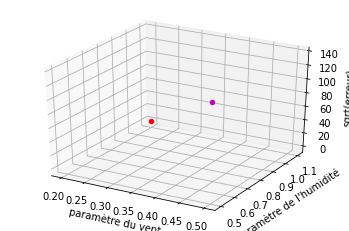

val = 134.966 et h= 0.01
a_0= 136.0905
a_1= 135.85350000000003
a_2= 133.73199999999997
a_3= 135.51100000000005
a_4= 134.5665
a_5= 136.00799999999995
a_6= 134.76749999999998
a_7= 132.99200000000002
132.99200000000002
inf trouvé
a_7==min_
0.51 0.51


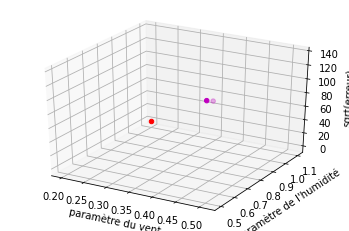

val = 134.51999999999992 et h= 0.01
a_0= 135.00599999999997
a_1= 134.00349999999997
a_2= 133.4024999999999
a_3= 134.24800000000005
a_4= 132.803
a_5= 134.442
a_6= 132.54250000000005
a_7= 131.88749999999993
131.88749999999993
inf trouvé
a_7==min_
0.52 0.52


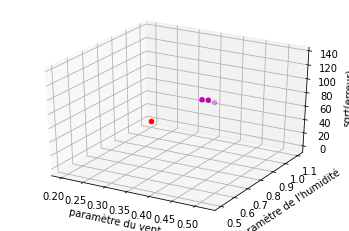

val = 131.22049999999996 et h= 0.01
a_0= 133.4200000000001
a_1= 133.56
a_2= 132.12449999999995
a_3= 131.39900000000006
a_4= 129.953
a_5= 132.53099999999998
a_6= 130.68449999999993
a_7= 129.66599999999997
129.66599999999997
inf trouvé
a_7==min_
0.53 0.53


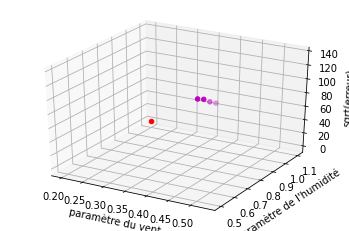

val = 129.53150000000002 et h= 0.01
a_0= 131.69749999999993
a_1= 132.27599999999998
a_2= 129.94050000000001
a_3= 130.65349999999998
a_4= 129.149
a_5= 131.10149999999993
a_6= 129.6905
a_7= 127.53849999999994
127.53849999999994
inf trouvé
a_7==min_
0.54 0.54


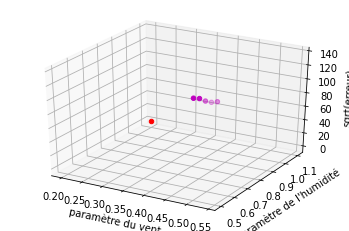

val = 130.32699999999994 et h= 0.01
a_0= 130.8875
a_1= 129.13299999999998
a_2= 128.07799999999995


In [ ]:
apprentisage (0.5, 0.5 ,liste_NDVI_point_vent_tempsenfeu_val,20,0.0000001,[],[],[],0.01)